# Alloys Property Predictions by Regression Trees

#### Here we are implementing the Decision Regression Trees to predict Physical Properties of Alloys by their Chemical Composition [C2P] a regression problem


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/Alloys.csv')

In [ ]:
df = df.drop(['Alloy', 'Tensile Strength: Ultimate (UTS) (psi)'], axis=1)

## Knowing the data

In [ ]:
df.head()

,Melting Completion (Liquidus),Al,As,B,C,Ca,Ce,Co,Cr,Cu,...,S,Se,Si,Sn,Ta,Ti,V,W,Zn,Zr
0,1440.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,12.75,0.0,...,0.020,0.0,0.750,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,1450.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,12.75,0.0,...,0.020,0.0,0.325,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,1470.0,0.0,0.0,0.0,0.240,0.0,0.0,0.0,11.75,0.0,...,0.015,0.0,0.500,0.0,0.0,0.0,0.25,1.1,0.0,0.0
3,1440.0,0.0,0.0,0.0,0.300,0.0,0.0,0.0,12.75,0.0,...,0.020,0.0,0.750,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,1430.0,0.0,0.0,0.0,0.300,0.0,0.0,0.0,12.75,0.0,...,0.300,0.0,0.750,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [ ]:
df.shape

(2672, 31)

In [ ]:
df.isnull().sum()

,0
Melting Completion (Liquidus),0
Al,0
As,0
B,0
C,0
Ca,0
Ce,0
Co,0
Cr,0
Cu,0


In [ ]:
df.describe()

,Melting Completion (Liquidus),Al,As,B,C,Ca,Ce,Co,Cr,Cu,...,S,Se,Si,Sn,Ta,Ti,V,W,Zn,Zr
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,...,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.00000,2672.000000,2672.000000
mean,1448.802395,0.021032,0.000041,0.000245,0.306628,0.000236,0.000429,0.297043,8.640277,0.235767,...,0.018739,0.000967,0.513387,0.000060,0.001628,0.031641,0.089899,0.29085,0.000038,0.001256
std,48.560590,0.124116,0.000640,0.002205,0.577888,0.002376,0.005033,1.849442,9.467644,0.649120,...,0.030811,0.015029,0.631835,0.000801,0.036246,0.165613,0.395642,1.75383,0.001381,0.008436
min,1160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1430.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.150000,0.000000,...,0.007500,0.000000,0.225000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1460.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,2.400000,0.000000,...,0.015000,0.000000,0.325000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1460.000000,0.000000,0.000000,0.000000,0.350000,0.000000,0.000000,0.000000,18.000000,0.150000,...,0.017500,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1830.000000,1.900000,0.010000,0.075000,3.650000,0.025000,0.075000,20.250000,33.000000,6.500000,...,0.305000,0.275000,6.000000,0.012500,1.025000,2.150000,4.900000,19.75000,0.050500,0.085000


In [ ]:
df.corr()

,Melting Completion (Liquidus),Al,As,B,C,Ca,Ce,Co,Cr,Cu,...,S,Se,Si,Sn,Ta,Ti,V,W,Zn,Zr
Melting Completion (Liquidus),1.000000,-0.044553,-0.069442,0.017162,-0.147544,0.048227,-0.088806,0.216913,-0.290118,-0.116203,...,-0.036642,-0.031219,-0.444217,-0.083778,-0.002295,-0.019054,0.533462,0.766205,-0.016236,0.019164
Al,-0.044553,1.000000,0.004176,0.005551,-0.054378,0.059328,-0.012184,0.033855,0.046976,-0.037668,...,-0.047612,-0.010235,0.002269,-0.000621,0.032332,0.175709,-0.032172,-0.024579,0.061527,0.000657
As,-0.069442,0.004176,1.000000,0.022016,0.297691,-0.006385,-0.005475,-0.010328,-0.057112,0.010866,...,-0.019188,0.048374,0.159631,0.797625,-0.002888,-0.004520,0.012724,-0.010664,-0.001760,-0.009572
B,0.017162,0.005551,0.022016,1.000000,-0.033978,0.054338,0.003517,0.057905,-0.008096,-0.031138,...,-0.030709,-0.007162,-0.036054,0.014995,0.069964,0.097854,-0.004932,-0.002546,0.121119,0.074462
C,-0.147544,-0.054378,0.297691,-0.033978,1.000000,-0.049193,-0.035664,0.028951,-0.295671,-0.092053,...,0.175738,-0.005179,0.422954,0.227823,-0.016164,-0.089988,0.238804,0.113148,-0.009788,-0.060897
Ca,0.048227,0.059328,-0.006385,0.054338,-0.049193,1.000000,-0.008457,0.460021,-0.089317,-0.035244,...,-0.044293,-0.006394,-0.072850,-0.007422,-0.004461,0.366619,-0.019236,-0.016473,-0.002718,0.097274
Ce,-0.088806,-0.012184,-0.005475,0.003517,-0.035664,-0.008457,1.000000,-0.013679,0.134180,-0.030933,...,-0.022646,-0.005482,0.075068,-0.006364,-0.003825,-0.016271,-0.019352,-0.014124,-0.002330,-0.012677
Co,0.216913,0.033855,-0.010328,0.057905,0.028951,0.460021,-0.013679,1.000000,-0.027142,-0.041479,...,-0.044866,-0.007312,-0.059595,-0.012005,0.384331,0.179912,0.248009,0.266429,0.269427,0.116112
Cr,-0.290118,0.046976,-0.057112,-0.008096,-0.295671,-0.089317,0.134180,-0.027142,1.000000,0.254419,...,-0.065666,0.010549,0.174539,-0.021314,0.055261,0.078660,-0.088024,-0.044804,0.038627,-0.120622
Cu,-0.116203,-0.037668,0.010866,-0.031138,-0.092053,-0.035244,-0.030933,-0.041479,0.254419,1.000000,...,-0.024389,-0.021317,0.049933,0.018192,-0.000407,-0.007559,-0.044292,-0.022234,-0.009943,-0.019452


In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]

In [ ]:
X.head()

,Al,As,B,C,Ca,Ce,Co,Cr,Cu,Fe,...,S,Se,Si,Sn,Ta,Ti,V,W,Zn,Zr
0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,12.75,0.0,85.15,...,0.020,0.0,0.750,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,0.0,0.0,0.0,0.075,0.0,0.0,0.0,12.75,0.0,85.25,...,0.020,0.0,0.325,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,0.0,0.0,0.0,0.240,0.0,0.0,0.0,11.75,0.0,83.60,...,0.015,0.0,0.500,0.0,0.0,0.0,0.25,1.1,0.0,0.0
3,0.0,0.0,0.0,0.300,0.0,0.0,0.0,12.75,0.0,84.90,...,0.020,0.0,0.750,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,0.0,0.0,0.0,0.300,0.0,0.0,0.0,12.75,0.0,84.95,...,0.300,0.0,0.750,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [ ]:
y.head()

,Melting Completion (Liquidus)
0,1440.0
1,1450.0
2,1470.0
3,1440.0
4,1430.0


## Training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=33)

In [ ]:
reg_tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)

In [ ]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_pred = reg_tree.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.915655419312915

# Evaluating hyper parameter influence
Analyzing the impact of the each of the hyper paramether from the list of hyper parameters [`max_depth`, `max_features`, `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`] on the R2 score of a `DecisionTreeRegressor` model trained the alloy dataset.
<br/>
So we train the model with varying one of the hyper parameter value at a time while keeping other hyperparameters at their default settings. Visualize the relationship between the choosen hyper parameter and R2 score and provide a  explanation for the observed trend.

## `max_depth` hyperparameter

In [ ]:
r2_scores_max_depth = []
max_depth_values = range(1, 36)

for depth in max_depth_values:
    reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=33) # Added random_state for reproducibility
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores_max_depth.append(r2)

Plotting relationship between max_depth and R2 score.



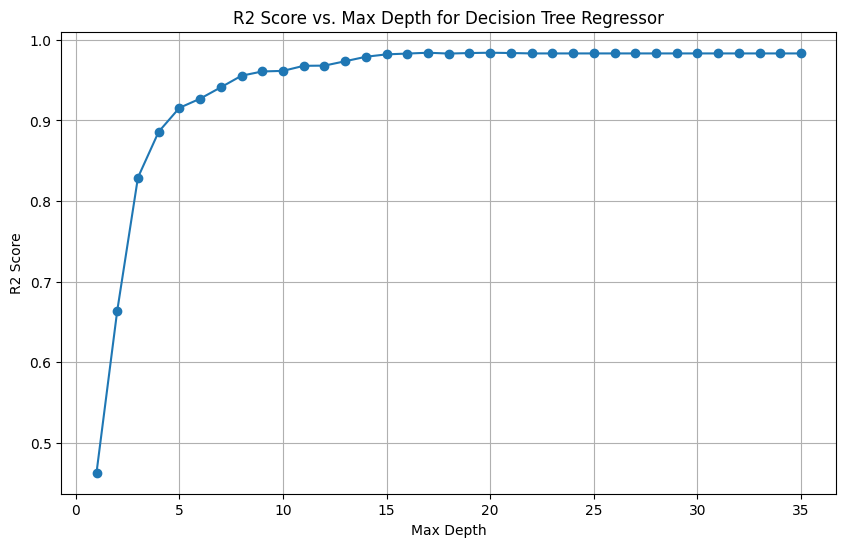

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_scores_max_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Max Depth for Decision Tree Regressor')
plt.grid(True)
plt.show()

**Observation**:-
The R² score improves as max_depth increases significantly, since deeper trees capture more complex patterns. However, beyond a depth of ~15-18, the test R² plateaus or slightly declines, showing signs of little overfitting. Thus, a max_depth in the range of 10-15 strikes the best balance between capturing meaningful relationships and avoiding unnecessary complexity that leads no improvements in performance.

## `max_features` hyperparameter

In [ ]:
r2_scores_max_features = []
# acc. to scikit learn max_features can be float (fraction of features) or int (number of features) or string ('sqrt', 'log2') or None
# heree we will use a range of float values and the strings 'sqrt' and 'log2'
max_features_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'sqrt', 'log2']

for features in max_features_values:
    reg_tree = DecisionTreeRegressor(max_features=features, random_state=33)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores_max_features.append(r2)

plot_max_features_values = [i if isinstance(i, (int, float)) else (1.1 if i == 'sqrt' else 1.2) for i in max_features_values]

Plotting relationship between max_features and R2 score.

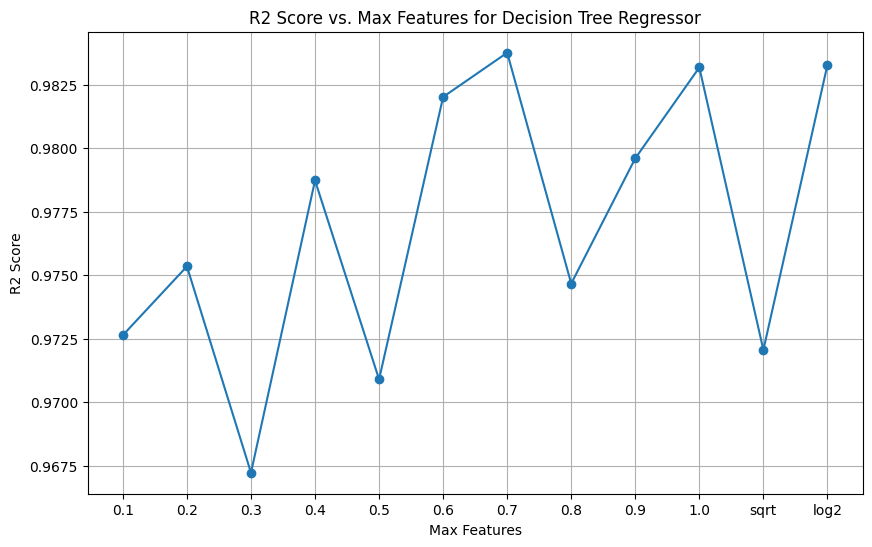

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(plot_max_features_values, [str(i) for i in max_features_values])
plt.xlabel('Max Features')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Max Features for Decision Tree Regressor')
plt.grid(True)
plt.show()

**Observation**:-
The R2 score shows variability as the `max_features` parameter changes. Generally, increasing the number of features considered at each split tends to improve the R2 score up to a certain point. This is because the model has more options to find the best splits that reduce impurity. However, using a very small fraction of features (e.g., 0.1 or 0.3) can lead to lower R2 scores, as the model might miss important features (imp elements) for making accurate predictions of alloy meleting point. The highest R2 scores are observed when `max_features` is around 0.7, 1.0. This suggests that a significant portion of the features, or using the 'log2' heuristics also works well for this dataset. Using all features (1.0) also performs well, indicating that most features are relevant. The dips in performance at 0.3 and 0.5 might be due to random chance in feature selection at those specific fractions missing crucial features for some splits. **Given that this is an alloy dataset where features represent elemental composition, randomly omitting large amount certain elements can indeed negatively impact predictive performance, contributing to the observed variability.**

## `min_samples_split` hyperparameter
threshold no of samples for which node becomes leaf node finally stop splitting

In [ ]:
r2_scores_min_samples_split = []
# min_samples_split can be an integer or a float according to scikit learn implementation
min_samples_split_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 5, 10, 20, 50, 100]

for split in min_samples_split_values:
    reg_tree = DecisionTreeRegressor(min_samples_split=split, random_state=33)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores_min_samples_split.append(r2)


Plotting relationship between min_samples_split and R2 score.

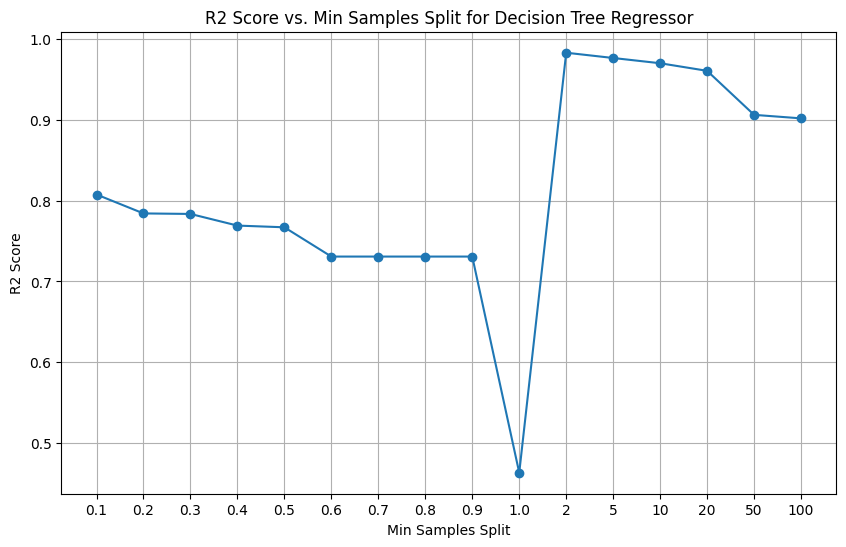

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(min_samples_split_values)), r2_scores_min_samples_split, marker='o')
plt.xticks(range(len(min_samples_split_values)), [str(i) for i in min_samples_split_values])
plt.xlabel('Min Samples Split')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Min Samples Split for Decision Tree Regressor')
plt.grid(True)
plt.show()

**Observation**:-
The plot shows a intersting change in R2 score as `min_samples_split` increases. When `min_samples_split` is a fraction (0.1 to 1.0), the R2 score is relatively low and stable. This is because the tree is delibrately restricted by us from making splits unless a large fraction of the samples are present in a node, leading to a very simple tree that cannot capture the complexity of the out dataset. When `min_samples_split` is an integer (2 or more), the R2 score jumps significantly and remains high. This is because the tree is allowed to split nodes with fewer samples, enabling it to build a more complex and accurate model for given dataset. The R2 score remains high for smaller integer values of `min_samples_split`, but there is a slight decrease as the value gets very large (e.g., 50 or 100). This is expected, as requiring a very large number of samples to split a node will again limit the tree's complexity and potentially lead to underfitting. The optimal performance is achieved when `min_samples_split` is a small integer (like 2 or 5), allowing the tree to capture the underlying complex patterns of alloy melting prediction dataset without being overly restricted.

## `min_samples_leaf` hyperparameter
min no of samples that must be present in the leaf node (so that the leaf node contain only 1 (few) sample are not allowed which cause variation/overfitting)

In [ ]:
r2_scores_min_samples_leaf = []
min_samples_leaf_values = [1, 2, 5, 10, 20, 50, 100]

for leaf in min_samples_leaf_values:
    reg_tree = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=33)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores_min_samples_leaf.append(r2)

Plotting relationship between min_samples_split and R2 score.

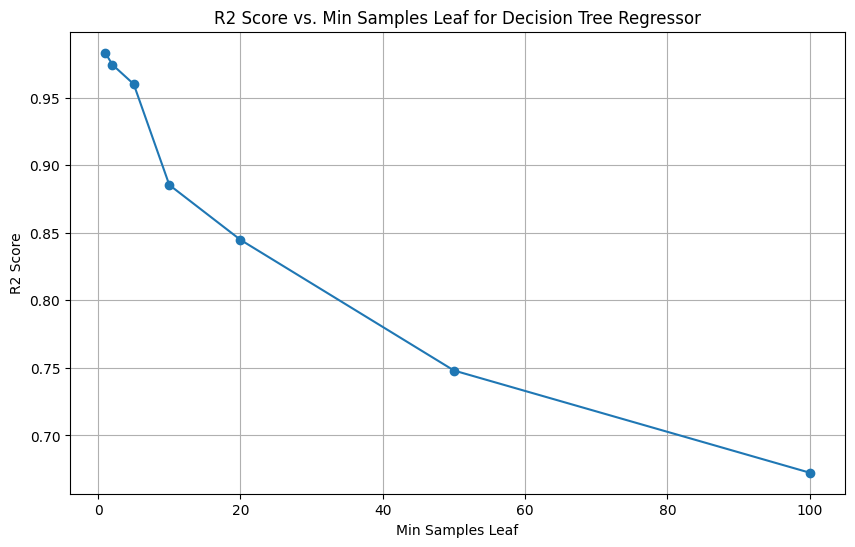

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, r2_scores_min_samples_leaf, marker='o')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Min Samples Leaf for Decision Tree Regressor')
plt.grid(True)
plt.show()

**Observation**:- Here low min_sample_leaf value result in higher R2 score, however generally very low value of the min_sample leaf increases the risk of overfit but as we are ploting this graph on the test results here it seems that even with specific leaves the model generalize well on the dataset. As we increase the value of the min_sample_leaf it forces the tree to become more simppler and leads to the significant underfitting here.
<br/>
In the context of this alloy dataset, where the melting point is likely influenced by complex interactions between multiple elements, allowing the decision tree to create more detailed branches with fewer samples per leaf node (i.e., using smaller min_samples_leaf values) seems crucial for achieving high predictive accuracy.

## `max_leaf_nodes` hyperparameter
max no of leaf nodes allowed

In [ ]:
r2_scores_max_leaf_nodes = []
max_leaf_nodes_values = [None, 10, 20, 50, 100, 200, 300, 400, 500]

for nodes in max_leaf_nodes_values:
    reg_tree = DecisionTreeRegressor(max_leaf_nodes=nodes, random_state=33)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores_max_leaf_nodes.append(r2)

# For plotting, replaceing None with a numerical value outside the range of other values
plot_max_leaf_nodes_values = [i if i is not None else 0 for i in max_leaf_nodes_values]

Plotting relationship between max_leaf_nodes and R2 score.

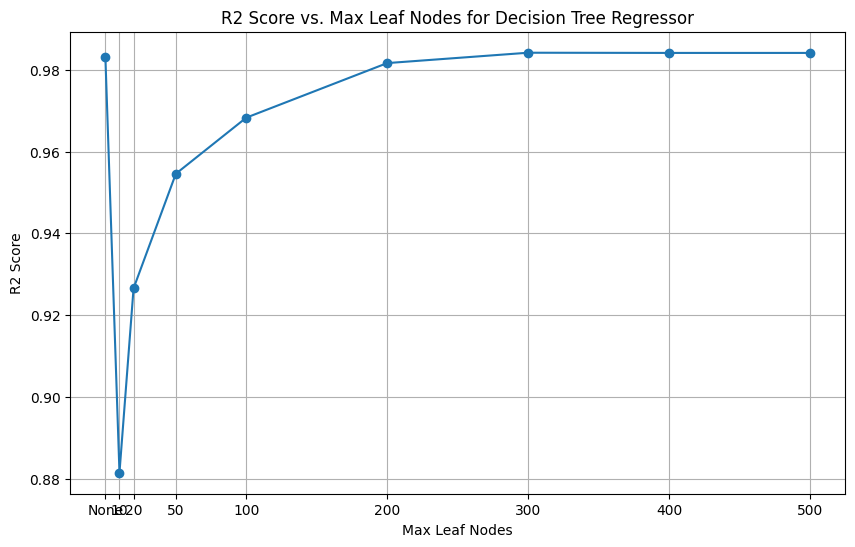

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(plot_max_leaf_nodes_values, r2_scores_max_leaf_nodes, marker='o')
plt.xticks(plot_max_leaf_nodes_values, [str(i) for i in max_leaf_nodes_values])
plt.xlabel('Max Leaf Nodes')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Max Leaf Nodes for Decision Tree Regressor')
plt.grid(True)
plt.show()

**Observation**:- Here `max_leaf_nodes` also reflects the same observation/insight as the `min_samples_leaf`! as the max_leaf_nodes increases R2 score increases significantly and then plateaus. for low values liek 10, 20 etc it forces model to be less complex and lead to underfitting. Once we start increasing max_leaf_nodes the R2 scores increases allowing model to capture more and more complex patterns of our dataset (create more detailed branches). But once the max_leaf_nodes is large enough (300, 400, 500 and more) R2 score dont grow it plateaus suggesting adding the further complesity does not lead to better generalization of the dataset anymore. Hence optimal range appears to be 200-300.

In [ ]:
"""Taking the best values we got while comparision of individual hyper parameter impact on the error (rembeber we did not check best combination we kept all other hyperparemeters default while changing one)"""

decision_reg_tree = DecisionTreeRegressor(max_depth=18, min_samples_leaf=2, min_samples_split=2, max_leaf_nodes=300, max_features=1.0, random_state=33)
decision_reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=18, max_features=1.0, max_leaf_nodes=300,
                      min_samples_leaf=2, random_state=33)

In [ ]:
# testing
y_pred_best = decision_reg_tree.predict(X_test)
best_r2_score = r2_score(y_test, y_pred_best)
print(f"R2 Score with best checked parameters: {best_r2_score}")

R2 Score with best checked parameters: 0.9732076671405759


## Let's Do Hyper Parameter Tuning Now
using grid search ...

In [ ]:
param_grid = {
    'max_depth':[2, 5, 10, 15, 25, 30, 35, None],
    'criterion':['squared_error','absolute_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0, 2],
}

In [ ]:
regression = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid, n_jobs=-1)

In [ ]:
regression.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 5, 10, 15, 25, 30, 35, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0, 2]})

In [ ]:
regression.best_score_

np.float64(0.9745213295725957)

In [ ]:
regression.best_params_

{'criterion': 'absolute_error',
 'max_depth': 30,
 'max_features': 1.0,
 'min_samples_split': 2}

In [ ]:
# Now creating tree with the best parameters
best_reg_tree = DecisionTreeRegressor(**regression.best_params_)
best_reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=30,
                      max_features=1.0)

In [ ]:
# testing
y_pred_best = best_reg_tree.predict(X_test)
best_r2_score = r2_score(y_test, y_pred_best)
print(f"R2 Score with best parameters: {best_r2_score}")

R2 Score with best parameters: 0.9820199390582358


In [ ]:
param_grid_big = {
    'max_depth':[2, 5, 10, 15, 25, 30, 35, None],
    'criterion':['squared_error','absolute_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0, 2],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 20, 100, 200, 300]
}

In [ ]:
regression_big = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid_big, n_jobs=-1, verbose=2)

In [ ]:
regression_big.fit(X_train,y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 5, 10, 15, 25, 30, 35, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'max_leaf_nodes': [None, 20, 100, 200, 300],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [0.25, 0.5, 1.0, 2]},
             verbose=2)

In [ ]:
regression_big.best_score_

np.float64(0.9714027956927846)

In [ ]:
regression_big.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
best_big_reg_tree = DecisionTreeRegressor(**regression_big.best_params_)
best_big_reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_features=1.0)

In [ ]:
# testing
y_big_pred_best = best_big_reg_tree.predict(X_test)
print(f"R2 Score with best parameters: {r2_score(y_test, y_big_pred_best)}")

R2 Score with best parameters: 0.9841466129330682


# Feature Importance

In [ ]:
for importance, name inin sorted(zip(reg_tree.feature_importances_, X_train.columns),reverse=True):
    print (name, '  =>  ' , importance)

W   =>   0.5968196185140796
Si   =>   0.14015319954591526
Mn   =>   0.09598155886099961
Cr   =>   0.0789584122999526
Fe   =>   0.03139401245862908
Mo   =>   0.02215604202404694
Ni   =>   0.010406806968259706
C   =>   0.006905179380778631
V   =>   0.005389129567694102
Cu   =>   0.0029294692178789823
S   =>   0.002457422228727612
P   =>   0.0022890627079250572
N   =>   0.0014325165708153468
Ti   =>   0.0008058217907563654
Nb   =>   0.0007566546271585702
Al   =>   0.0007452616410871494
Co   =>   0.0003775812794216062
Ta   =>   2.2798012806998843e-05
B   =>   1.9452303066789014e-05
Zr   =>   0.0
Zn   =>   0.0
Sn   =>   0.0
Se   =>   0.0
Pb   =>   0.0
O   =>   0.0
Mg   =>   0.0
La   =>   0.0
Ce   =>   0.0
Ca   =>   0.0
As   =>   0.0
